Credits: https://residentmario.github.io/geoplot/user_guide/Working_with_Geospatial_Data.html

More examples: https://residentmario.github.io/geoplot/gallery/index.html

-----------------

Working with Geospatial Data

geoplot is a high-level Python geospatial plotting library. It’s an extension to cartopy and matplotlib which makes mapping easy: like seaborn for geospatial.

pip install geopandas

pip install geoplot

Import libraries

In [125]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt

Example data

We read a GeoDataFrame straight out of geospatial files: our borough information was stored in the GeoJSON format

In [14]:
# load the example data
nyc_boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
nyc_boroughs.loc[:1]

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330385.03697,1.623853e+09,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,4,Queens,861038.47930,3.049947e+09,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ..."


In [16]:
nyc_boroughs.geometry

0    MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...
1    MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ...
2    MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ...
3    MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...
4    MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...
Name: geometry, dtype: geometry

In [18]:
nyc_boroughs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
nyc_map_pluto_sample = gpd.read_file(gplt.datasets.get_path('nyc_map_pluto_sample'))
nyc_map_pluto_sample.loc[:1]

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,Shape_Leng,Shape_Area,geometry
0,MN,1,10,101,5,1022,02,1,10004,E007,...,None,0.0,None,1,1,1,18v2.1,12277.824113,7.550340e+06,"POLYGON ((979561.871 191884.249, 979585.211 19..."
1,MN,1,101,101,1,1001,02,1,10004,E007,...,None,0.0,None,1,None,1,18v2.1,3940.840373,5.018974e+05,"POLYGON ((972382.826 190647.267, 972301.458 19..."


Projection, more projection example after this tutorial

In [22]:
nyc_map_pluto_sample.crs = {'init': 'epsg:2263'}
nyc_map_pluto_sample.crs

/home/1bd3b540-42c2-496c-9c2f-e2c130335288/.local/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- E[east]: Easting (US survey foot)
- N[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [30]:
nyc_map_pluto_sample = nyc_map_pluto_sample.to_crs(epsg=4326)
nyc_map_pluto_sample.iloc[:2]

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,Shape_Leng,Shape_Area,geometry
0,MN,1,10,101,5,1022,02,1,10004,E007,...,None,0.0,None,1,1,1,18v2.1,12277.824113,7.550340e+06,"POLYGON ((-74.01691 40.69335, -74.01682 40.693..."
1,MN,1,101,101,1,1001,02,1,10004,E007,...,None,0.0,None,1,None,1,18v2.1,3940.840373,5.018974e+05,"POLYGON ((-74.04279 40.68995, -74.04309 40.689..."


shapely defines few types of geometries: Point, MultiPoint, LineString, MultiLineString, LinearRing, Polygon, MultiPolygon

In [32]:
type(nyc_boroughs.geometry.iloc[0])

shapely.geometry.multipolygon.MultiPolygon

In [35]:
type(nyc_map_pluto_sample.geometry.iloc[0])

shapely.geometry.polygon.Polygon

Deconstructing a set of Polygon or MultiPolygon objects into simplified convex hulls

CPU times: user 66.4 ms, sys: 0 ns, total: 66.4 ms
Wall time: 72.6 ms


<Axes: >

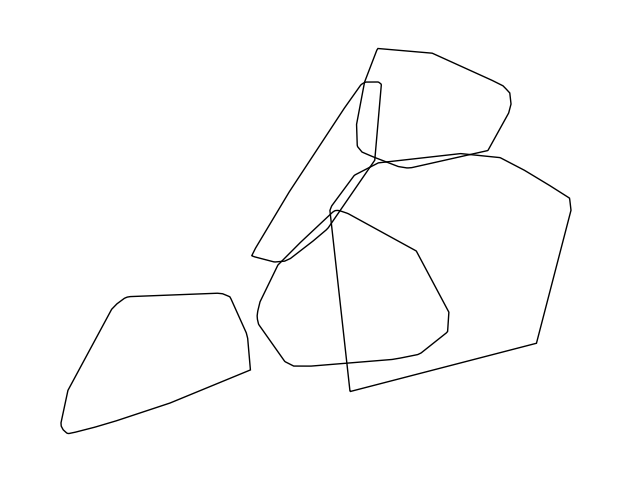

In [37]:
%time gplt.polyplot(nyc_boroughs.geometry.map(lambda shp: shp.convex_hull))

In [41]:
%time nyc_boroughs.convex_hull

CPU times: user 23.3 ms, sys: 0 ns, total: 23.3 ms
Wall time: 21.7 ms


0    POLYGON ((-74.24712 40.49612, -74.24731 40.496...
1    POLYGON ((-73.94074 40.54182, -73.96261 40.738...
2    POLYGON ((-73.98336 40.56953, -74.00209 40.569...
3    POLYGON ((-74.02306 40.68292, -74.04478 40.688...
4    POLYGON ((-73.87831 40.78536, -73.88692 40.786...
dtype: geometry

Define your own geometry, X and Y, geocode

In [47]:
nyc_collisions_sample = pd.read_csv(gplt.datasets.get_path('nyc_collisions_sample'))
nyc_collisions_sample

,LATITUDE,LONGITUDE,DATE,TIME
0,40.767373,-73.950057,04/16/2016,4:13
1,40.862670,-73.909039,04/16/2016,4:30
2,40.716507,-73.961275,04/16/2016,4:30
3,40.749788,-73.987768,04/16/2016,4:30
4,40.702401,73.960496,04/16/2016,4:50


Import shapely and initialize gpd

In [50]:
from shapely.geometry import Point

collision_points = nyc_collisions_sample.apply(
    lambda srs: Point(float(srs['LONGITUDE']), float(srs['LATITUDE'])),
    axis='columns'
)
collision_points

0    POINT (-73.950057 40.767373)
1     POINT (-73.909039 40.86267)
2    POINT (-73.961275 40.716507)
3    POINT (-73.987768 40.749788)
4     POINT (73.960496 40.702401)
dtype: object

Pass geometries

In [56]:
import geopandas as gpd
nyc_collisions_sample_geocoded = gpd.GeoDataFrame(nyc_collisions_sample, geometry=collision_points)
nyc_collisions_sample_geocoded

,LATITUDE,LONGITUDE,DATE,TIME,geometry
0,40.767373,-73.950057,04/16/2016,4:13,POINT (-73.95006 40.76737)
1,40.862670,-73.909039,04/16/2016,4:30,POINT (-73.90904 40.86267)
2,40.716507,-73.961275,04/16/2016,4:30,POINT (-73.96128 40.71651)
3,40.749788,-73.987768,04/16/2016,4:30,POINT (-73.98777 40.74979)
4,40.702401,73.960496,04/16/2016,4:50,POINT (73.96050 40.70240)


Put info without geometry on a map

Data without geometry info

In [59]:
obesity = pd.read_csv(gplt.datasets.get_path('obesity_by_state'), sep='\t')
obesity.head()

,State,Percent
0,Alabama,32.4
1,Missouri,30.4
2,Alaska,28.4
3,Montana,24.6
4,Arizona,26.8


Data with geometry info

In [61]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
contiguous_usa.loc[:2]

,state,adm1_code,population,geometry
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013..."
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7..."
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199..."


Join

In [73]:
result = contiguous_usa.set_index('state').join(obesity.set_index('State'))
result.head()

,adm1_code,population,geometry,Percent
state,,,,
Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",25.5
Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7...",24.6
North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199...",31.0
Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0...",29.6
Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1...",27.2


Plot on a map

<GeoAxes: >

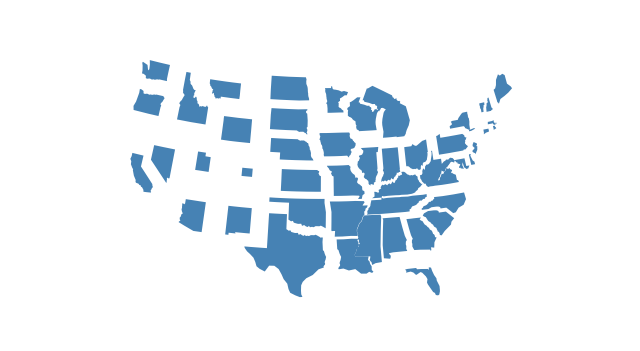

In [80]:
import geoplot.crs as gcrs
gplt.cartogram(result, scale='Percent', projection=gcrs.AlbersEqualArea())

Save

In [84]:
nyc_boroughs.to_file('boroughs.geojson', driver='GeoJSON')

-------------

Projection, better than .to_crs

<GeoAxes: >

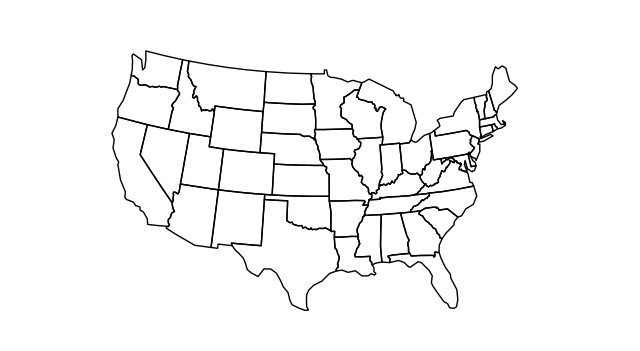

In [136]:
import geoplot.crs as gcrs
gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())

<GeoAxes: >

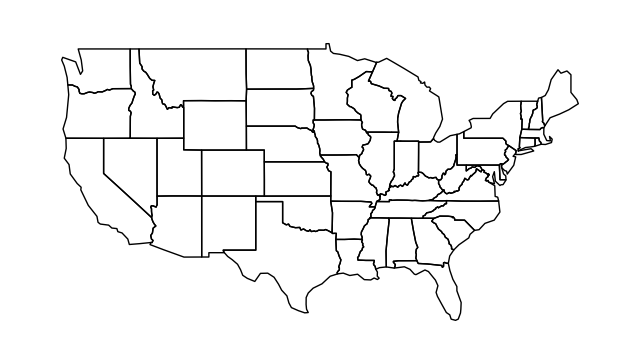

In [138]:
gplt.polyplot(contiguous_usa, projection=gcrs.Mercator())

Stacking plots, more about extent in the next tutorial

<GeoAxes: >

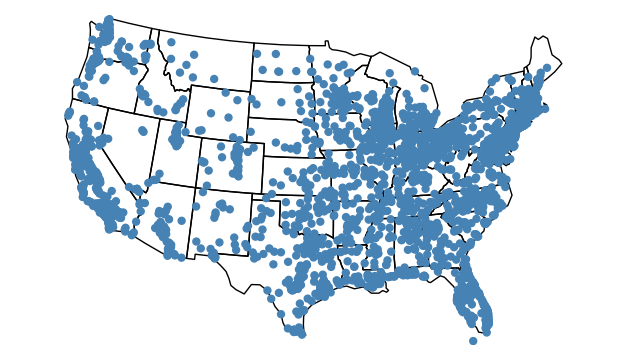

In [140]:
cities=gpd.read_file(gplt.datasets.get_path('usa_cities'))
ax=gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())
gplt.pointplot(cities,ax=ax,extent=contiguous_usa.total_bounds)

Projection on subplot

<Axes: >

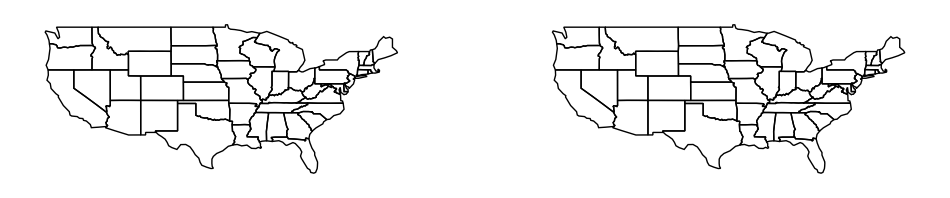

In [144]:
f, axarr = plt.subplots(1, 2, figsize=(12, 4))
gplt.polyplot(contiguous_usa, ax=axarr[0])
gplt.polyplot(contiguous_usa, ax=axarr[1])

matplotlib supports subplotting projected maps using the projection argument to subplot_kw.

<GeoAxes: >

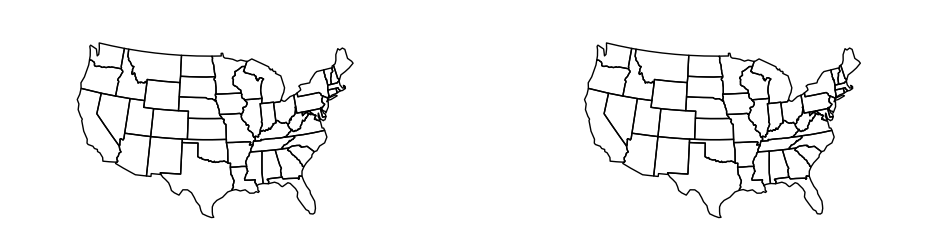

In [129]:
proj = gcrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5)

f, axarr = plt.subplots(1, 2, figsize=(12, 4), subplot_kw={'projection': proj})

gplt.polyplot(contiguous_usa, projection=proj, ax=axarr[0])
gplt.polyplot(contiguous_usa, projection=proj, ax=axarr[1])

Customizing plots

In [150]:
continental_usa_cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))
continental_usa_cities = continental_usa_cities.query('STATE not in ["AK", "HI", "PR"]')
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))

Hue

<GeoAxes: >

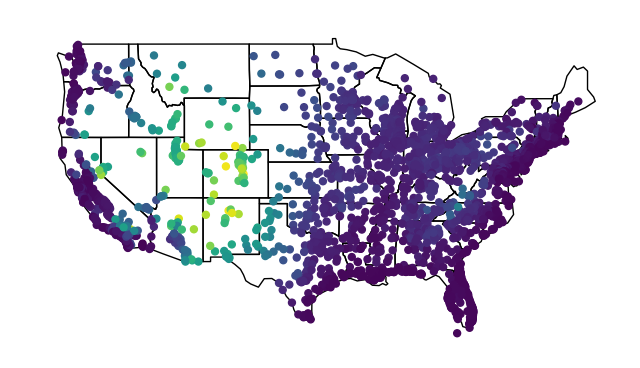

In [182]:
ax = gplt.polyplot(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(continental_usa_cities, hue='ELEV_IN_FT', ax=ax)

Classify

<GeoAxes: >

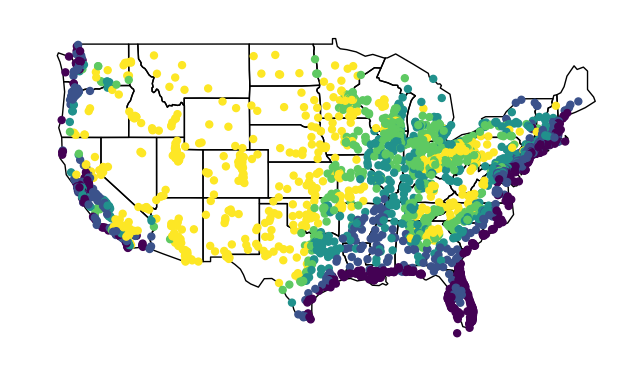

In [195]:
import mapclassify as mc
scheme=mc.Quantiles(continental_usa_cities['ELEV_IN_FT'],k=5)

ax=gplt.polyplot(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(continental_usa_cities,hue='ELEV_IN_FT',scheme=scheme,ax=ax)

Change color ramp

<GeoAxes: >

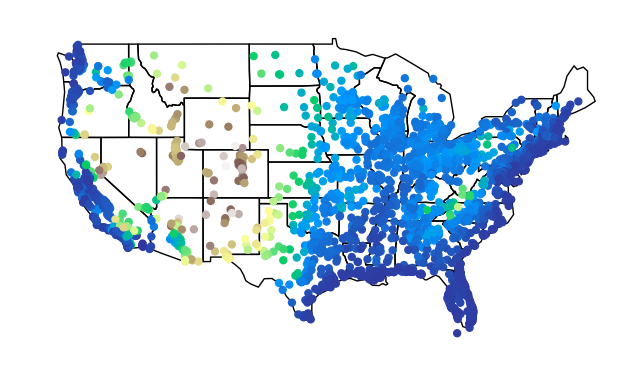

In [189]:
ax = gplt.polyplot(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(continental_usa_cities,hue='ELEV_IN_FT', cmap='terrain',ax=ax)

Graduated size symbol

In [200]:
large_continental_usa_cities = continental_usa_cities.query('POP_2010 > 100000')

<GeoAxes: >

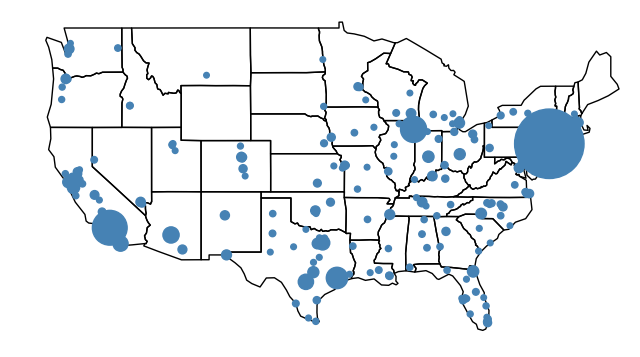

In [202]:
ax = gplt.polyplot(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(large_continental_usa_cities,
               projection=gcrs.AlbersEqualArea(),
               scale='POP_2010', limits=(4,50),
               ax=ax)

Add a legend

<GeoAxes: >

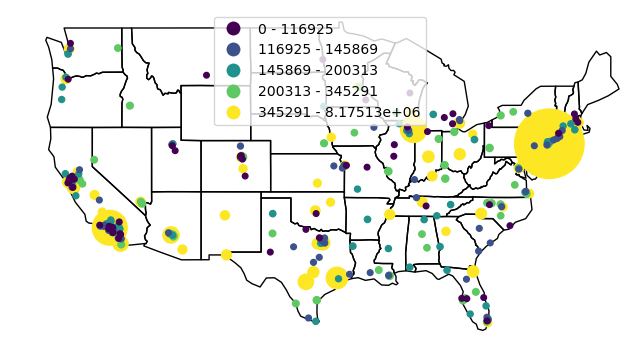

In [225]:
scheme=mc.Quantiles(large_continental_usa_cities['POP_2010'],k=5)
ax=gplt.polyplot(contiguous_usa,projection=gcrs.WebMercator())
gplt.pointplot(large_continental_usa_cities,
               projection=gcrs.AlbersEqualArea(),
               scale='POP_2010', limits=(4,50),
               hue='POP_2010', cmap='viridis', scheme=scheme,
               legend=True, legend_var='hue',
               ax=ax)

Continuous bar legend

<GeoAxes: >

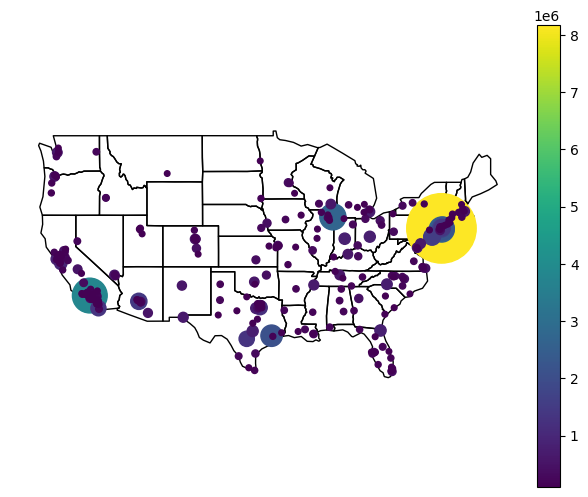

In [228]:
scheme=mc.Quantiles(large_continental_usa_cities['POP_2010'],k=5)
ax=gplt.polyplot(contiguous_usa,projection=gcrs.WebMercator())
gplt.pointplot(large_continental_usa_cities,
               projection=gcrs.AlbersEqualArea(),
               scale='POP_2010', limits=(4,50),
               hue='POP_2010', cmap='viridis', 
               legend=True, legend_var='hue',
               ax=ax)

Hue variable Scale legend

<GeoAxes: >

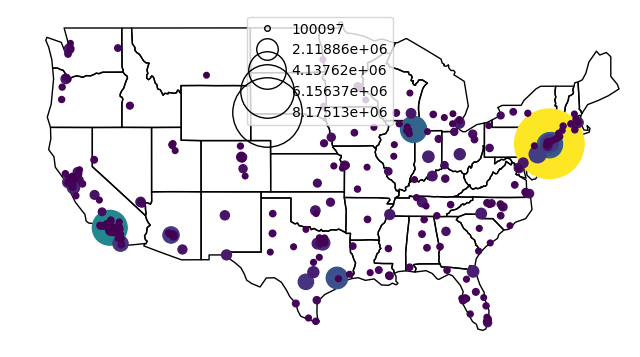

In [232]:
scheme=mc.Quantiles(large_continental_usa_cities['POP_2010'],k=5)
ax=gplt.polyplot(contiguous_usa,projection=gcrs.WebMercator())
gplt.pointplot(large_continental_usa_cities,
               projection=gcrs.AlbersEqualArea(),
               scale='POP_2010', limits=(4,50),
               hue='POP_2010', cmap='viridis', 
               legend=True, legend_var='scale',
               ax=ax)

Format legend

<GeoAxes: >

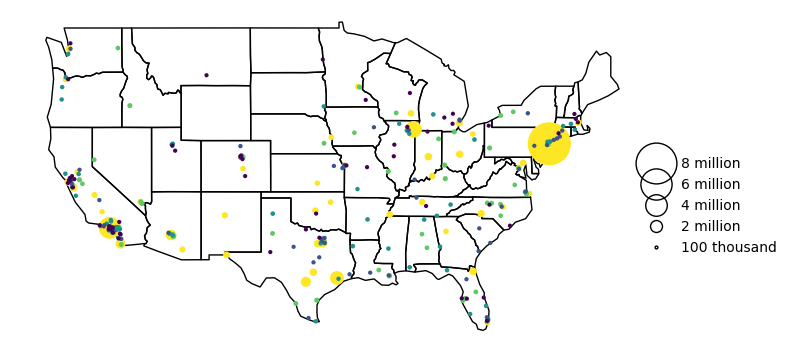

In [249]:
ax = gplt.polyplot(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(
    large_continental_usa_cities, projection=gcrs.AlbersEqualArea(),
    scale='POP_2010', limits=(2, 30),
    hue='POP_2010', cmap='viridis', scheme=scheme,
    legend=True, legend_var='scale',
    legend_kwargs={'bbox_to_anchor': (1, 0.6), 'frameon': False},
    legend_values=[8000000, 6000000, 4000000, 2000000, 100000],
    legend_labels=['8 million', '6 million', '4 million', '2 million', '100 thousand'],
    ax=ax
)

Extent

<GeoAxes: >

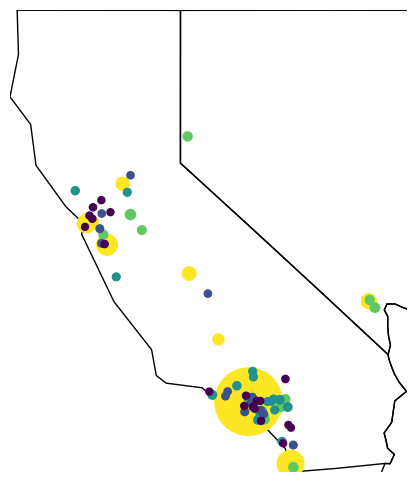

In [252]:
scheme = mc.Quantiles(large_continental_usa_cities['POP_2010'], k=5)

extent = contiguous_usa.query('state == "California"').total_bounds
ax = gplt.pointplot(large_continental_usa_cities, 
                    projection=gcrs.WebMercator(),
                    scale='POP_2010', limits=(5, 100),
                    hue='POP_2010', scheme=scheme, cmap='viridis')
gplt.polyplot(contiguous_usa, ax=ax, extent=extent)

Cosmetics: edgecolor, linewidth, facecolor

In [256]:
scheme = mc.Quantiles(continental_usa_cities['POP_2010'], k=5)
proj = gcrs.AlbersEqualArea()

Text(0.5, 1.0, 'Cities in the contiguous United States, 2010')

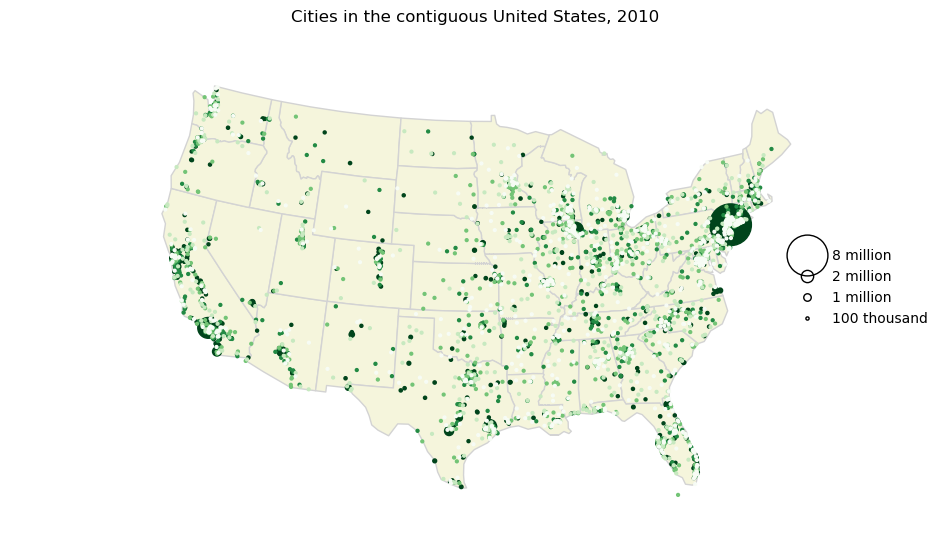

In [276]:
ax = gplt.polyplot(contiguous_usa,
                   zorder=-1,
                   linewidth=1, projection=proj,
                   edgecolor='lightgray',facecolor='beige',
                   figsize=(12, 12))

gplt.pointplot(continental_usa_cities,
               scale='POP_2010',limits=(2, 30),
               hue='POP_2010',cmap='Greens',scheme=scheme,
               legend=True,legend_var='scale',
               legend_values=[8000000, 2000000, 1000000, 100000],
               legend_labels=['8 million', '2 million', '1 million', '100 thousand'],
               legend_kwargs={'frameon': False, 'loc': 'right'},
               ax=ax)
plt.title("Cities in the contiguous United States, 2010")

Choropleth

<GeoAxes: >

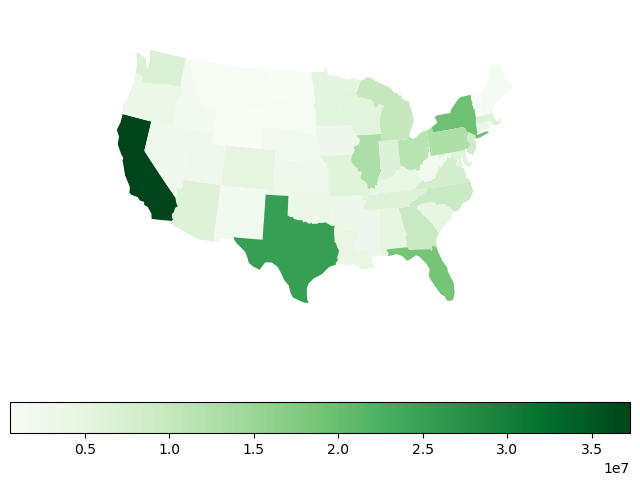

In [285]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
gplt.choropleth(contiguous_usa, 
                projection=gcrs.AlbersEqualArea(), 
                hue='population',cmap='Greens',
                legend=True,legend_kwargs={'orientation': 'horizontal'})

<GeoAxes: >

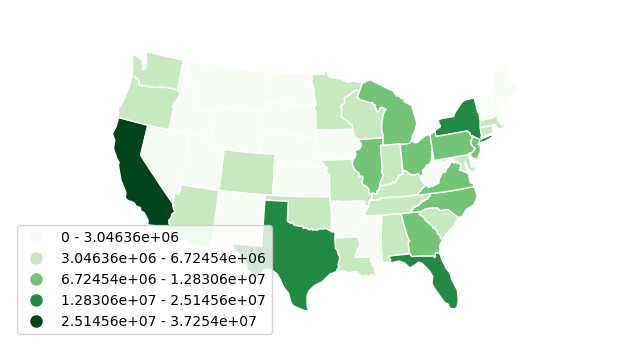

In [287]:
scheme = mc.FisherJenks(contiguous_usa['population'], k=5)
gplt.choropleth(contiguous_usa, 
                hue='population', projection=gcrs.AlbersEqualArea(),
                edgecolor='white', linewidth=1,
                cmap='Greens', scheme=scheme,
                legend=True, legend_kwargs={'loc': 'lower left'})

<GeoAxes: >

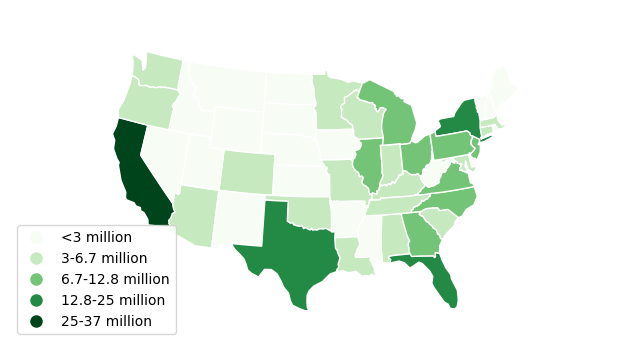

In [289]:
gplt.choropleth(contiguous_usa, 
                hue='population', projection=gcrs.AlbersEqualArea(),
                edgecolor='white', linewidth=1,
                cmap='Greens', scheme=scheme,
                legend=True, legend_kwargs={'loc': 'lower left'},
                legend_labels=['<3 million', '3-6.7 million', '6.7-12.8 million',
        '12.8-25 million', '25-37 million'])

KDE plot

In [296]:
boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
collisions = gpd.read_file(gplt.datasets.get_path('nyc_collision_factors'))

<GeoAxes: >

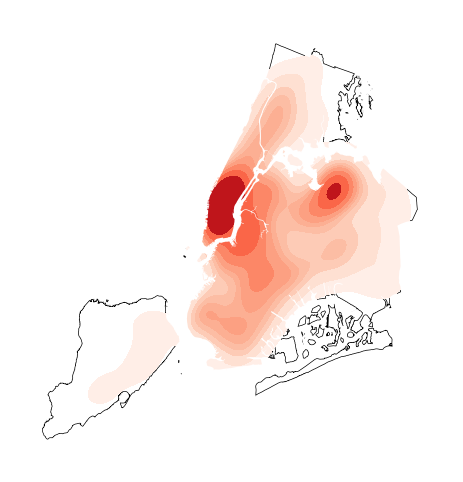

In [299]:
ax = gplt.polyplot(boroughs, projection=gcrs.AlbersEqualArea(), zorder=1)
gplt.kdeplot(collisions, 
             cmap='Reds', fill=True, thresh=0.05,
             clip=boroughs, 
             ax=ax)

Cartogram again but with customization

<GeoAxes: >

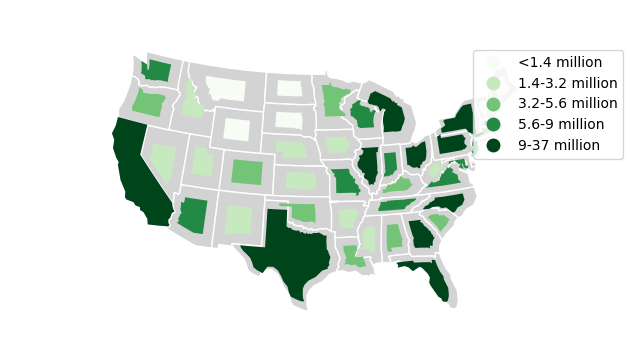

In [306]:
scheme = mc.Quantiles(contiguous_usa['population'], k=5)
ax = gplt.cartogram(contiguous_usa, 
                    scale='population', projection=gcrs.AlbersEqualArea(),
                    hue='population', scheme=scheme, cmap='Greens',
                    legend=True, legend_kwargs={'bbox_to_anchor': (1, 0.9)}, 
                    legend_var='hue', 
                    legend_labels=['<1.4 million', '1.4-3.2 million',
                                    '3.2-5.6 million','5.6-9 million', 
                                    '9-37 million'],
                    limits=(0.5, 1))

gplt.polyplot(contiguous_usa, 
              facecolor='lightgray', edgecolor='white', 
              ax=ax)